In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [211]:
color_dict = {'T+C.32': (0.847, 0.106, 0.376, 1.0),
 'PM.5': (0.902, 0.318, 0.0, 1.0),
 'PM.7': (1.0, 0.549, 0.0, 1.0),
 'T.11': (1.0, 0.718, 0.302, 1.0),
 'PM.3': (0.082, 0.396, 0.753, 1.0),
 'T.9': (0.18, 0.49, 0.196, 1.0),
 'G.24': (0.941, 0.384, 0.573, 1.0),
 'T.12': (0.259, 0.647, 0.961, 1.0),
 'PM.2': (0.4, 0.733, 0.416, 1.0),
 'PM.4': (0.89, 0.106, 0.137, 1.0),
 'PM.0': (0.6, 0.196, 0.8, 1.0),
 'PM.1': (1.0, 0.843, 0.0, 1.0),
 'T+C.26': (0.251, 0.878, 0.816, 1.0),
 'T.8': (0.647, 0.165, 0.165, 1.0),
 'PM.6': (0.0, 0.5, 0.5, 1.0),
 'G.23': (1.0, 0.0, 1.0, 1.0)}

In [110]:
data

,Unnamed: 0,pathway,pval,padj,log2err,ES,NES,size,score
0,1,PM.0,0.010689,0.047170,0.229089,-0.521441,-1.669925,31,-1.971044
3,4,PM.1,0.053881,0.107762,0.076378,0.455872,1.408709,40,1.268564
6,7,PM.2,0.663593,0.758392,0.017562,0.323485,0.858804,20,0.178098
1,2,PM.3,0.011792,0.047170,0.166521,0.517220,1.580305,38,1.928396
2,3,PM.4,0.044727,0.107762,0.083854,0.456273,1.430652,43,1.349426
5,6,PM.5,0.343976,0.458635,0.036080,-0.387609,-1.080424,18,-0.463472
4,5,PM.6,0.318396,0.458635,0.028635,0.358637,1.095775,38,0.497032
7,8,PM.7,0.843868,0.843868,0.013406,0.250143,0.764284,38,0.073726


In [111]:
sns.set_theme(style="white", context="talk")


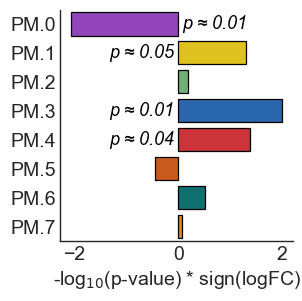

In [130]:
data = pd.read_csv('../../processed_data/fgsea_rs3752246.csv')
data = data.sort_values(by='pathway')
data.reset_index(drop=True, inplace=True)

plt.figure(figsize=(3, 3))
sns.barplot(y='pathway', x='score', data=data, hue='pathway', palette=color_dict, dodge=False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('-log$_{10}$(p-value) * sign(logFC)', fontsize=14)
plt.ylabel('', fontsize=14)
ax.legend_.remove()
ax.tick_params(axis='both', which='both', direction='in', length=5, labelsize=14)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['top'].set_linewidth(0)   # if you want to keep it hidden
ax.spines['right'].set_linewidth(0) 
#ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold')

# Annotate the bars with the scores
for index, row in data.iterrows():
    if index == 0:
        plt.text(0.7, index, f'p ≈ {row["pval"]:.2f}', color='black', ha="center", va="center", fontsize=13, fontstyle='italic')
    else:
        if row['pval'] < 0.1:
            plt.text(-0.7, index, f'p ≈ {row["pval"]:.2f}', color='black', ha="center", va="center", fontsize=13, fontstyle='italic')


# Outline each bar
for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(.9)

plt.savefig('../../paper/main_plots/rs3752246_fgsea_barplot.png', dpi=300, bbox_inches='tight')

In [135]:
data_layers = []
for i in ['set1', 'set2', 'set3']:
    data = pd.read_csv(f'../../processed_data/fgsea_rs3752246_{i}.csv')
    data = data.sort_values(by='pathway')
    data.reset_index(drop=True, inplace=True)
    df = data[['pathway', 'score']]
    df['group'] = i
    data_layers.append(df)

/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_39648/163743223.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['group'] = i
/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_39648/163743223.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['group'] = i
/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_39648/163743223.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

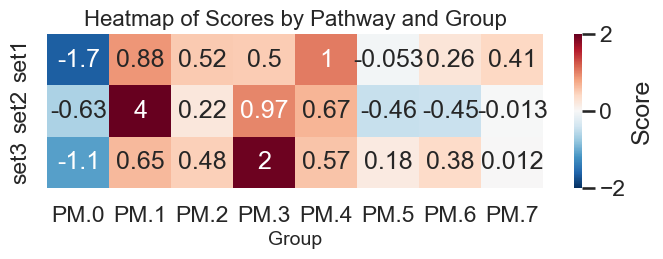

In [156]:
data_combined = pd.concat(data_layers)
data_pivot = data_combined.pivot(index="pathway", columns="group", values="score")
plt.figure(figsize=(8, 2))
sns.heatmap(data_pivot.T, annot=True, cmap="RdBu_r", vmin=-2, vmax=2, cbar_kws={'label': 'Score'})
plt.xlabel('Group', fontsize=14)
plt.ylabel('', fontsize=14)
plt.title('Heatmap of Scores by Pathway and Group', fontsize=16)
plt.show()

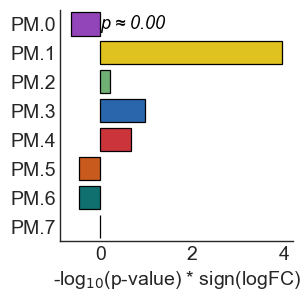

In [122]:
data = pd.read_csv('../../processed_data/fgsea_rs3752246_set2.csv')
data = data.sort_values(by='pathway')

plt.figure(figsize=(3, 3))
sns.barplot(y='pathway', x='score', data=data, hue='pathway', palette=color_dict, dodge=False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('-log$_{10}$(p-value) * sign(logFC)', fontsize=14)
plt.ylabel('', fontsize=14)
ax.legend_.remove()
ax.tick_params(axis='both', which='both', direction='in', length=5, labelsize=14)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['top'].set_linewidth(0)   # if you want to keep it hidden
ax.spines['right'].set_linewidth(0) 
#ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold')

# Annotate the bars with the scores
for index, row in data.iterrows():
    if index == 0:
        plt.text(0.7, index, f'p ≈ {row["pval"]:.2f}', color='black', ha="center", va="center", fontsize=13, fontstyle='italic')
    else:
        if row['pval'] < 0.1:
            plt.text(-0.7, index, f'p ≈ {row["pval"]:.2f}', color='black', ha="center", va="center", fontsize=13, fontstyle='italic')


# Outline each bar
for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(.9)

#plt.savefig('../../paper/main_plots/rs3752246_fgsea_barplot.png', dpi=300, bbox_inches='tight')

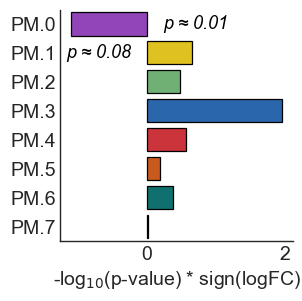

In [125]:
data = pd.read_csv('../../processed_data/fgsea_rs3752246_set3.csv')
data = data.sort_values(by='pathway')

plt.figure(figsize=(3, 3))
sns.barplot(y='pathway', x='score', data=data, hue='pathway', palette=color_dict, dodge=False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('-log$_{10}$(p-value) * sign(logFC)', fontsize=14)
plt.ylabel('', fontsize=14)
ax.legend_.remove()
ax.tick_params(axis='both', which='both', direction='in', length=5, labelsize=14)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['top'].set_linewidth(0)   # if you want to keep it hidden
ax.spines['right'].set_linewidth(0) 
#ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold')

# Annotate the bars with the scores
for index, row in data.iterrows():
    if index == 0:
        plt.text(0.7, index, f'p ≈ {row["pval"]:.2f}', color='black', ha="center", va="center", fontsize=13, fontstyle='italic')
    else:
        if row['pval'] < 0.1:
            plt.text(-0.7, index, f'p ≈ {row["pval"]:.2f}', color='black', ha="center", va="center", fontsize=13, fontstyle='italic')


# Outline each bar
for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(.9)

#plt.savefig('../../paper/main_plots/rs3752246_fgsea_barplot.png', dpi=300, bbox_inches='tight')

In [243]:
### plot scores
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def get_scores_per_cluster(data, frame, cluster_column):
    g_names  = np.array(frame['description'][frame['is_gene']])
    scores = pd.DataFrame(data['score'])
    scores.columns = ['iN']
    SCORES = np.array(scores.loc[g_names])

    names = np.unique(frame[cluster_column])
    temp = [SCORES[frame[cluster_column][frame['is_gene']]==i] for i in names]

    return dict(zip(names, temp))


frame_pm = pd.read_csv('../../processed_data/pm_kl_frame.csv', index_col=0)
scores = pd.read_csv('../../processed_data/all_scores_0825.csv', index_col=0)
scores['score'] = scores['Ex']
frame_pm['cluster'] = ['PM.'+str(i) for i in frame_pm['cluster']]
scores_pm = get_scores_per_cluster(scores, frame_pm, 'cluster')

common_scores = pd.read_csv('../../common_variant_data/degs_rs3752246.csv', index_col=0)
common_scores['score'] = -np.log10(common_scores['P.Value'])*np.sign(common_scores['logFC'])
x = frame_pm[frame_pm['is_gene']]
x = x[[i in set(common_scores.index) for i in x['description']]]
scores_common = get_scores_per_cluster(common_scores, x, 'cluster')


In [244]:
# Create a list of rows
rows = []
for key, arr in scores_common.items():
    # Ensure we flatten the array in case it's two-dimensional
    for val in arr:
        rows.append([key, val[0]])  # use val[0] since each val is a 1-element array

# Create the DataFrame
df_common = pd.DataFrame(rows, columns=['Key', 'Value'])
df_common['group'] = 'common'

# Create a list of rows
rows = []
for key, arr in scores_pm.items():
    # Ensure we flatten the array in case it's two-dimensional
    for val in arr:
        rows.append([key, val[0]])  # use val[0] since each val is a 1-element array

# Create the DataFrame
df_pm = pd.DataFrame(rows, columns=['Key', 'Value'])
df_pm['group'] = 'pm'

In [245]:
df = pd.concat([df_common, df_pm])

In [240]:
df

,Key,Value,group
0,PM.0,0.117175,common
1,PM.0,0.070751,common
2,PM.0,-1.103960,common
3,PM.0,0.225127,common
4,PM.0,-2.649812,common
...,...,...,...
263,PM.7,0.504720,pm
264,PM.7,0.449084,pm
265,PM.7,-2.077056,pm
266,PM.7,1.270538,pm


In [242]:
data = {
    'Key': ['PM.0']*30 + ['PM.1']*30,
    'Value': np.concatenate([np.random.randn(30), np.random.randn(30)*2]),
    'group': ['common']*15 + ['other']*15 + ['common']*15 + ['other']*15
}
df = pd.DataFrame(data)

df

,Key,Value,group
0,PM.0,-0.779389,common
1,PM.0,1.392189,common
2,PM.0,0.189794,common
3,PM.0,-0.279339,common
4,PM.0,-0.141616,common
5,PM.0,0.124779,common
6,PM.0,0.477750,common
7,PM.0,1.728337,common
8,PM.0,0.864041,common
9,PM.0,-0.311179,common


In [247]:
color_dict

{'T+C.32': (0.847, 0.106, 0.376, 1.0),
 'PM.5': (0.902, 0.318, 0.0, 1.0),
 'PM.7': (1.0, 0.549, 0.0, 1.0),
 'T.11': (1.0, 0.718, 0.302, 1.0),
 'PM.3': (0.082, 0.396, 0.753, 1.0),
 'T.9': (0.18, 0.49, 0.196, 1.0),
 'G.24': (0.941, 0.384, 0.573, 1.0),
 'T.12': (0.259, 0.647, 0.961, 1.0),
 'PM.2': (0.4, 0.733, 0.416, 1.0),
 'PM.4': (0.89, 0.106, 0.137, 1.0),
 'PM.0': (0.6, 0.196, 0.8, 1.0),
 'PM.1': (1.0, 0.843, 0.0, 1.0),
 'T+C.26': (0.251, 0.878, 0.816, 1.0),
 'T.8': (0.647, 0.165, 0.165, 1.0),
 'PM.6': (0.0, 0.5, 0.5, 1.0),
 'G.23': (1.0, 0.0, 1.0, 1.0)}

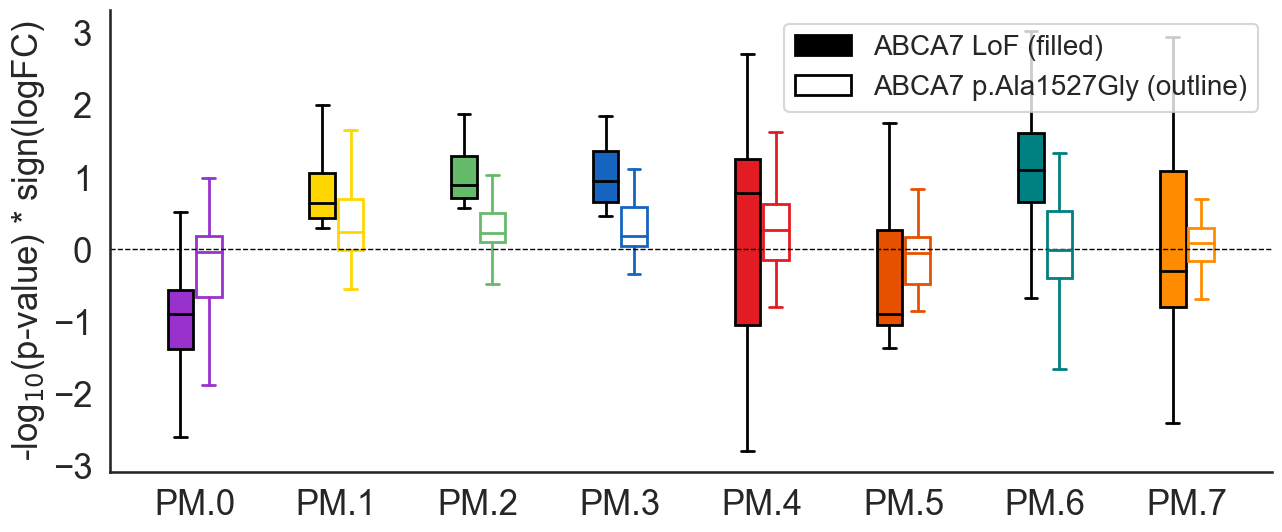

In [279]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define the order of the keys and a palette dictionary mapping each key to a color.
order = sorted(df['Key'].unique())
palette = color_dict.values #['#1f77b4', '#ff7f0e']  # example colors; update as needed
#palette_dict = dict(zip(order, palette))

# Create a mapping from each key to its numerical position
mapping = {k: i for i, k in enumerate(order)}
offset = 0.1  # offset value to shift boxes apart

fig, ax = plt.subplots(figsize=(15, 6))

# Loop over each key and plot the two groups with a slight offset
for name,key in enumerate(order):
    pos = mapping[key]
    color = color_dict[key]
    
    # Plot for the "common" group (filled box)
    data_common = df[(df['Key'] == key) & (df['group'] != 'common')]['Value']
    if not data_common.empty:
        bp_common = ax.boxplot(data_common,
                               positions=[pos - offset],
                               widths=0.18,
                               patch_artist=True,
                               showfliers=False)
        for patch in bp_common['boxes']:
            patch.set_facecolor(color)
            patch.set_linewidth(2)
            #patch.set_edgecolor(color)
        for line in bp_common['whiskers']:
            line.set_color('black')
            line.set_linewidth(2)
        for line in bp_common['caps']:
            line.set_color('black')
            line.set_linewidth(2)
        for line in bp_common['medians']:
            line.set_color('black')
            line.set_linewidth(2)
    
    # Plot for the non-common group (outline only)
    data_other = df[(df['Key'] == key) & (df['group'] == 'common')]['Value']
    if not data_other.empty:
        bp_other = ax.boxplot(data_other,
                              positions=[pos + offset],
                              widths=0.18,
                              patch_artist=True,
                              showfliers=False)
        for patch in bp_other['boxes']:
            patch.set_facecolor('none')
            patch.set_edgecolor(color)
            patch.set_linewidth(2)
        # Update the whiskers, caps, and medians to use the same color and linewidth
        for line in bp_other['whiskers']:
            line.set_color(color)
            line.set_linewidth(2)
        for line in bp_other['caps']:
            line.set_color(color)
            line.set_linewidth(2)
        for line in bp_other['medians']:
            line.set_color(color)
            line.set_linewidth(2)

# Set the x-axis ticks and labels to reflect the original keys
ax.set_xticks(list(mapping.values()))
ax.set_xticklabels(order)
# Add a horizontal line at y=0
ax.axhline(y=0, color='black', linewidth=1, linestyle='--')

# Remove the top and right axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create custom legend
import matplotlib.patches as mpatches

# Define custom legend elements
legend_elements = [
    mpatches.Patch(facecolor='black', edgecolor='black', linewidth=2, label='ABCA7 LoF (filled)'),
    mpatches.Patch(facecolor='none', edgecolor='black', linewidth=2, label='ABCA7 p.Ala1527Gly (outline)')
]

ax.set_ylabel('-log$_{10}$(p-value) * sign(logFC)', fontsize=20)

# Add the legend to the plot
ax.legend(handles=legend_elements, loc='upper right')


# Increase font size for everything
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(25)

# Increase font size for the legend
ax.legend(handles=legend_elements, loc='upper right', fontsize=20)

# Save the figure to a file
plt.savefig('../../paper/main_plots/common_variant_boxplot.png', format='png', dpi=300, bbox_inches='tight')
